In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), '..')))

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Black Scholes put

In [3]:
from pricer.analytical import BlackScholesPut
from pricer.pde_solver import BlackScholesPutPDE

In [4]:
analytical_config = {
    "underlier_price": np.linspace(1, 200, 1000),
    "strike": 100,
    "expiry": 1,
    "interest_rate": 0.05,
    "volatility": 0.2,
}

price_analytical = BlackScholesPut(**analytical_config).price()

In [5]:
n, m = 500, 100

pde_config = {
    "x": np.linspace(0, 200, n),
    "t": np.linspace(0, 1, m),
    "strike": 100,
    "r": 0.05,
    "sigma": 0.2,
}

price_pde_cls = BlackScholesPutPDE(pde_config)
price_pde_cls.solve()

points = np.zeros((1000, 2))
points[:, 0] = analytical_config["underlier_price"]
points[:, 1] = analytical_config["expiry"]

price_pde = price_pde_cls.price(points)

  0%|          | 0/99 [00:00<?, ?it/s]

100%|██████████| 99/99 [00:01<00:00, 60.65it/s]


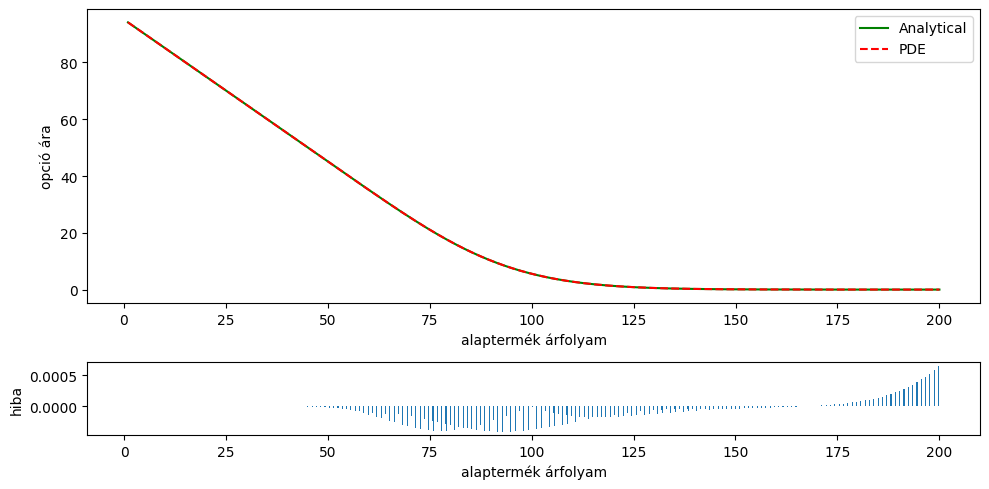

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(10, 5), gridspec_kw={'height_ratios': [4, 1]})

ax[0].plot(analytical_config["underlier_price"], price_analytical, label="Analytical", color="green")
ax[0].plot(analytical_config["underlier_price"], price_pde, label="PDE", color="red", linestyle="--")
ax[0].set_xlabel("alaptermék árfolyam")
ax[0].set_ylabel("opció ára")
ax[0].legend()

ax[1].bar(analytical_config["underlier_price"], price_analytical - price_pde, width=0.05)
ax[1].set_xlabel("alaptermék árfolyam")
ax[1].set_ylabel("hiba")

plt.tight_layout()
plt.show()

American put option

In [7]:
from pricer.pde_solver import AmericanBlackScholesPutPDE

In [2]:
analytical_config = {
    "underlier_price": np.linspace(1, 200, 1000),
    "strike": 100,
    "expiry": 0.5,
    "interest_rate": 0.05,
    "volatility": 0.3,
}

price_analytical = BlackScholesPut(**analytical_config).price()

NameError: name 'np' is not defined

In [ ]:
n, m = 500, 100

pde_config = {
    "x": np.linspace(0, 200, n),
    "t": np.linspace(0, 0.5, m),
    "strike": 100,
    "r": 0.05,
    "sigma": 0.2,
}

price_pde_cls = AmericanBlackScholesPutPDE(pde_config)
price_pde_cls.solve()

points = np.zeros((1000, 2))
points[:, 0] = analytical_config["underlier_price"]
points[:, 1] = analytical_config["expiry"]

price_pde = price_pde_cls.price(points)

100%|██████████| 99/99 [00:01<00:00, 50.53it/s]


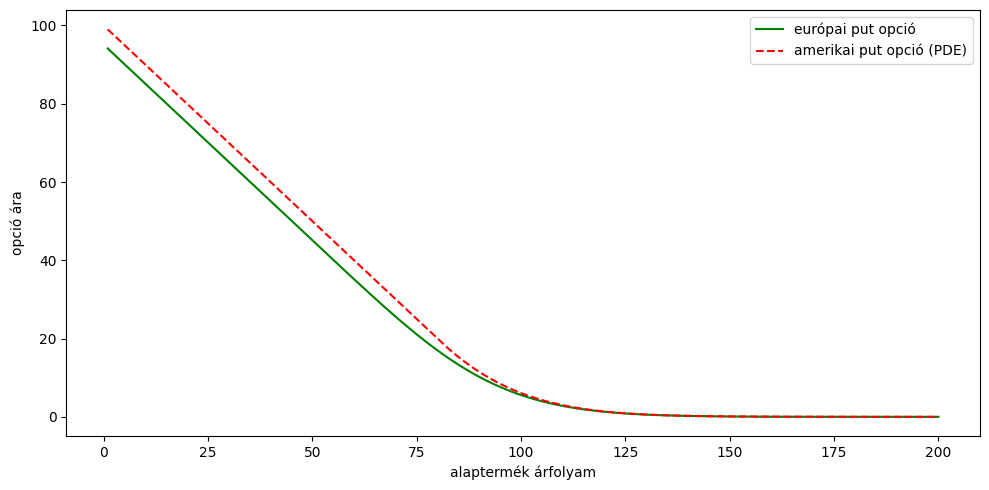

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(analytical_config["underlier_price"], price_analytical, label="európai put opció", color="green")
ax.plot(analytical_config["underlier_price"], price_pde, label="amerikai put opció (PDE)", color="red", linestyle="--")
ax.set_xlabel("alaptermék árfolyam")
ax.set_ylabel("opció ára")
ax.legend()

plt.tight_layout()
plt.show()

Up-and-out barrier call option

  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [00:01<00:00, 195.03it/s]


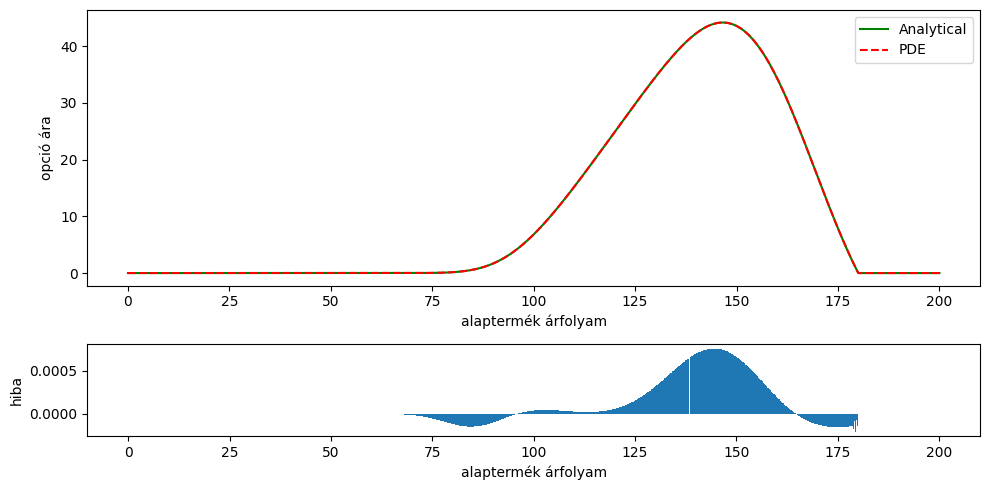

In [11]:
from pricer.analytical import BarrierUpAndOutCall, BlackScholesCall
from pricer.pde_solver import BarrierUpAndOutCallPDE

S = 200
K = 100
T = 1
r = 0.05
sigma = 0.1
H = 180

analytical_config = {
    "underlier_price": np.linspace(0.01, S, 1000),
    "strike": K,
    "expiry": T,
    "interest_rate": r,
    "volatility": sigma,
    "barrier": H,
}

analytical_config_call = {
    "underlier_price": np.linspace(0.01, S, 1000),
    "strike": K,
    "expiry": T,
    "interest_rate": r,
    "volatility": sigma,
}

price_analytical_call = BlackScholesCall(**analytical_config_call).price()
price_analytical = BarrierUpAndOutCall(**analytical_config).price()

n, m = 1000, 200

pde_config = {
    "x": np.linspace(0, S, n + 1),
    "t": np.linspace(0, T, m + 1),
    "strike": K,
    "r": r,
    "sigma": sigma,
    "barrier": H
}

price_pde_cls = BarrierUpAndOutCallPDE(pde_config)
price_pde_cls.solve()

points = np.zeros((1000, 2))
points[:, 0] = analytical_config["underlier_price"]
points[:, 1] = 1

price_pde = price_pde_cls.price(points)

fig, ax = plt.subplots(2, 1, figsize=(10, 5), gridspec_kw={'height_ratios': [3, 1]})

ax[0].plot(analytical_config["underlier_price"], price_analytical, label="Analytical", color="green")
# ax[0].plot(analytical_config["underlier_price"], price_analytical_call, label="call", color="black", lw=2)
ax[0].plot(analytical_config["underlier_price"], price_pde, label="PDE", color="red", linestyle="--")
ax[0].set_xlabel("alaptermék árfolyam")
ax[0].set_ylabel("opció ára")
ax[0].legend()

ax[1].bar(analytical_config["underlier_price"], price_analytical - price_pde, width=0.2)
ax[1].set_xlabel("alaptermék árfolyam")
ax[1].set_ylabel("hiba")

plt.tight_layout()
plt.show()

American up-and-out barrier call option

100%|██████████| 499/499 [00:01<00:00, 469.20it/s]


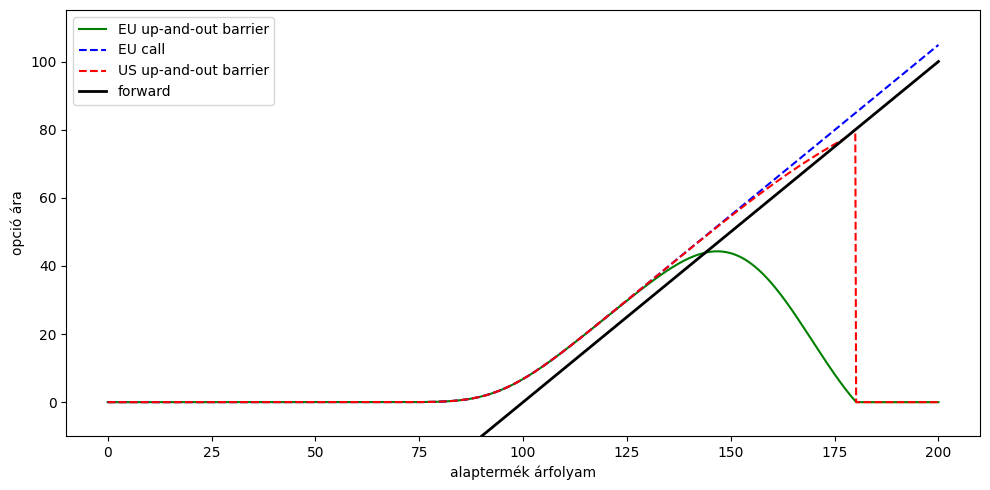

In [12]:
from pricer.pde_solver import BarrierUpAndOutCallPDE, AmericanBarrierUpAndOutCallPDE

S = 200
K = 100
T = 1
r = 0.05
sigma = 0.1
H = 180

n, m = 1000, 500

pde_config = {
    "x": np.linspace(0, S, n),
    "t": np.linspace(0, T, m),
    "strike": K,
    "r": r,
    "sigma": sigma,
    "barrier": H
}

price_pde_cls = BarrierUpAndOutCallPDE(pde_config)
price_pde_cls.solve()

points = np.zeros((n, 2))
points[:, 0] = pde_config["x"]
points[:, 1] = 1

price_pde = price_pde_cls.price(points)

price_pde_american_cls = AmericanBarrierUpAndOutCallPDE(pde_config)
price_pde_american_cls.solve()
price_pde_american = price_pde_american_cls.price(points)

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(pde_config["x"], price_pde, label="EU up-and-out barrier", color="green")
ax.plot(analytical_config_call["underlier_price"], price_analytical_call, label="EU call", color="blue", linestyle="--")
ax.plot(pde_config["x"], price_pde_american,  label="US up-and-out barrier", color="red", linestyle="--")
ax.plot(pde_config["x"], pde_config["x"] - K, label="forward", color="black", lw=2)
ax.set_xlabel("alaptermék árfolyam")
ax.set_ylabel("opció ára")
_, ymax = ax.get_ylim()
ax.set_ylim(-10, ymax)
ax.legend()

plt.tight_layout()
plt.show()

Up-and-out barrier put

100%|██████████| 200/200 [00:00<00:00, 329.52it/s]


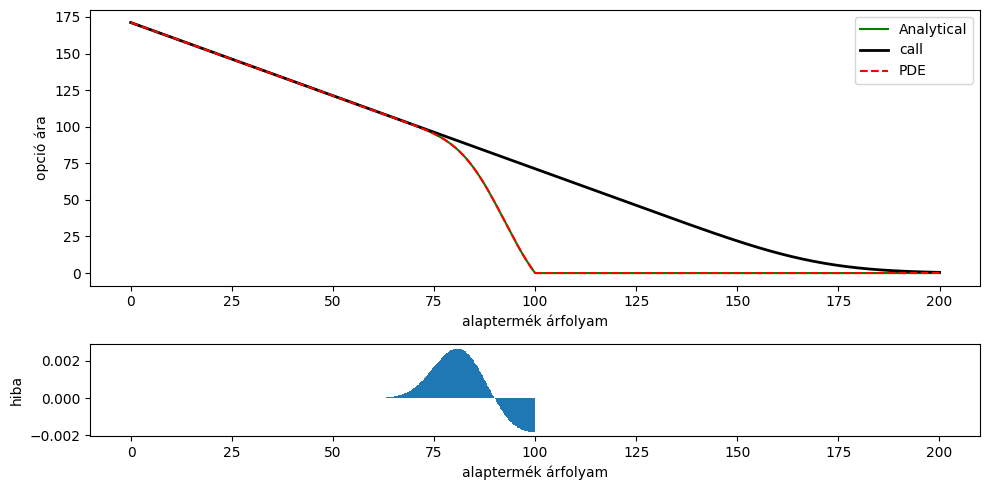

In [13]:
from pricer.analytical import BarrierUpAndOutPut, BlackScholesPut
from pricer.pde_solver import BarrierUpAndOutPutPDE

S = 200
K = 180
T = 1
r = 0.05
sigma = 0.1
H = 100

analytical_config = {
    "underlier_price": np.linspace(0.01, S, 1000),
    "strike": K,
    "expiry": T,
    "interest_rate": r,
    "volatility": sigma,
    "barrier": H,
}

analytical_config_call = {
    "underlier_price": np.linspace(0.01, S, 1000),
    "strike": K,
    "expiry": T,
    "interest_rate": r,
    "volatility": sigma,
}

price_analytical_call = BlackScholesPut(**analytical_config_call).price()
price_analytical = BarrierUpAndOutPut(**analytical_config).price()
price_analytical[analytical_config["underlier_price"] > H] = 0

n, m = 1000, 200

pde_config = {
    "x": np.linspace(0, S, n + 1),
    "t": np.linspace(0, T, m + 1),
    "strike": K,
    "r": r,
    "sigma": sigma,
    "barrier": H
}

price_pde_cls = BarrierUpAndOutPutPDE(pde_config)
price_pde_cls.solve()

points = np.zeros((1000, 2))
points[:, 0] = analytical_config["underlier_price"]
points[:, 1] = 1

price_pde = price_pde_cls.price(points)

fig, ax = plt.subplots(2, 1, figsize=(10, 5), gridspec_kw={'height_ratios': [3, 1]})

ax[0].plot(analytical_config["underlier_price"], price_analytical, label="Analytical", color="green")
ax[0].plot(analytical_config["underlier_price"], price_analytical_call, label="call", color="black", lw=2)
ax[0].plot(analytical_config["underlier_price"], price_pde, label="PDE", color="red", linestyle="--")
ax[0].set_xlabel("alaptermék árfolyam")
ax[0].set_ylabel("opció ára")
ax[0].legend()

ax[1].bar(analytical_config["underlier_price"], price_analytical - price_pde, width=0.2)
ax[1].set_xlabel("alaptermék árfolyam")
ax[1].set_ylabel("hiba")

plt.tight_layout()
plt.show()

American up-and-out barrier put

  0%|          | 0/500 [00:00<?, ?it/s]

100%|██████████| 500/500 [00:00<00:00, 642.52it/s]


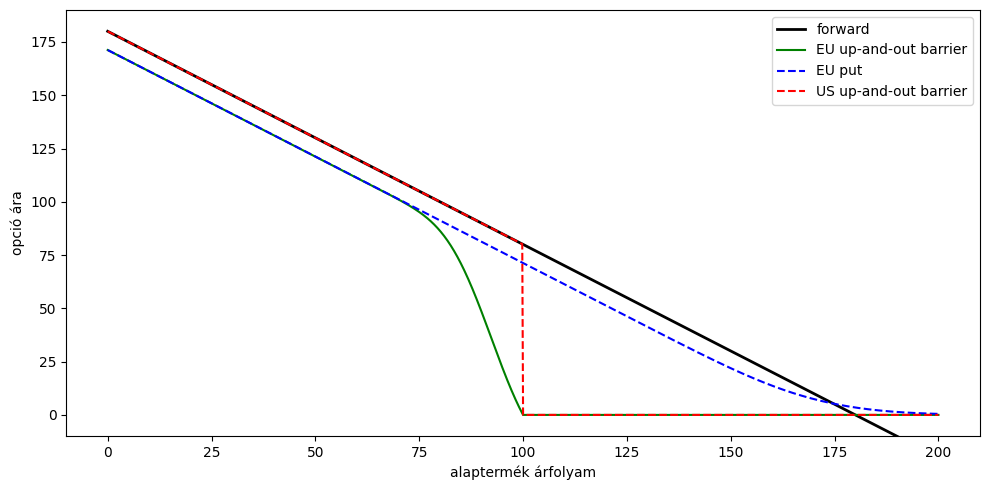

In [14]:
from pricer.pde_solver import BarrierUpAndOutPutPDE, AmericanBarrierUpAndOutPutPDE

S = 200
K = 180
T = 1
r = 0.05
sigma = 0.1
H = 100

n, m = 1000, 500

pde_config = {
    "x": np.linspace(0, S, n + 1),
    "t": np.linspace(0, T, m + 1),
    "strike": K,
    "r": r,
    "sigma": sigma,
    "barrier": H
}

price_pde_cls = BarrierUpAndOutPutPDE(pde_config)
price_pde_cls.solve()

points = np.zeros((n + 1, 2))
points[:, 0] = pde_config["x"]
points[:, 1] = 1

price_pde = price_pde_cls.price(points)

price_pde_american_cls = AmericanBarrierUpAndOutPutPDE(pde_config)
price_pde_american_cls.solve()
price_pde_american = price_pde_american_cls.price(points)

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(pde_config["x"], K - pde_config["x"], label="forward", color="black", lw=2)
ax.plot(pde_config["x"], price_pde, label="EU up-and-out barrier", color="green")
ax.plot(analytical_config_call["underlier_price"], price_analytical_call, label="EU put", color="blue", linestyle="--")
ax.plot(pde_config["x"], price_pde_american,  label="US up-and-out barrier", color="red", linestyle="--")
ax.set_xlabel("alaptermék árfolyam")
ax.set_ylabel("opció ára")
_, ymax = ax.get_ylim()
ax.set_ylim(-10, ymax)
ax.legend()

plt.tight_layout()
plt.show()

Up-and-in barrier call

c:\Users\Kristof\Desktop\MSc_Szakdolgozat\codebase\src\pricer\analytical.py:23: RuntimeWarning: divide by zero encountered in log
  np.log(self.underlier / self.strike)
c:\Users\Kristof\Desktop\MSc_Szakdolgozat\codebase\src\pricer\analytical.py:22: RuntimeWarning: divide by zero encountered in divide
  d1 = (
c:\Users\Kristof\Desktop\MSc_Szakdolgozat\codebase\src\pricer\analytical.py:22: RuntimeWarning: invalid value encountered in divide
  d1 = (
100%|██████████| 200/200 [00:00<00:00, 264.47it/s]


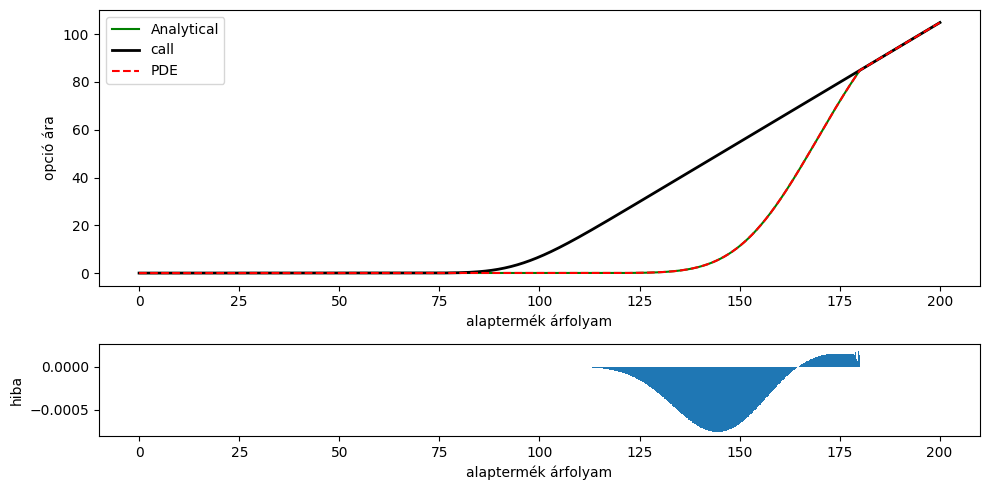

In [15]:
from pricer.analytical import BarrierUpAndInCall, BlackScholesCall
from pricer.pde_solver import BarrierUpAndInCallPDE

S = 200
K = 100
T = 1
r = 0.05
sigma = 0.1
H = 180

analytical_config = {
    "underlier_price": np.linspace(0.01, S, 1000),
    "strike": K,
    "expiry": T,
    "interest_rate": r,
    "volatility": sigma,
    "barrier": H,
}

analytical_config_call = {
    "underlier_price": np.linspace(0.01, S, 1000),
    "strike": K,
    "expiry": T,
    "interest_rate": r,
    "volatility": sigma,
}

price_analytical_call = BlackScholesCall(**analytical_config_call).price()
price_analytical = BarrierUpAndInCall(**analytical_config).price()

n, m = 1000, 200

pde_config = {
    "x": np.linspace(0, S, n + 1),
    "t": np.linspace(0, T, m + 1),
    "strike": K,
    "r": r,
    "sigma": sigma,
    "barrier": H
}

price_pde_cls = BarrierUpAndInCallPDE(pde_config)
price_pde_cls.solve()

points = np.zeros((1000, 2))
points[:, 0] = analytical_config["underlier_price"]
points[:, 1] = 1

price_pde = price_pde_cls.price(points)

fig, ax = plt.subplots(2, 1, figsize=(10, 5), gridspec_kw={'height_ratios': [3, 1]})

ax[0].plot(analytical_config["underlier_price"], price_analytical, label="Analytical", color="green")
ax[0].plot(analytical_config["underlier_price"], price_analytical_call, label="call", color="black", lw=2)
ax[0].plot(analytical_config["underlier_price"], price_pde, label="PDE", color="red", linestyle="--")
ax[0].set_xlabel("alaptermék árfolyam")
ax[0].set_ylabel("opció ára")
ax[0].legend()

ax[1].bar(analytical_config["underlier_price"], price_analytical - price_pde, width=0.2)
ax[1].set_xlabel("alaptermék árfolyam")
ax[1].set_ylabel("hiba")

plt.tight_layout()
plt.show()

American up-and-in call option

100%|██████████| 500/500 [00:01<00:00, 253.13it/s]


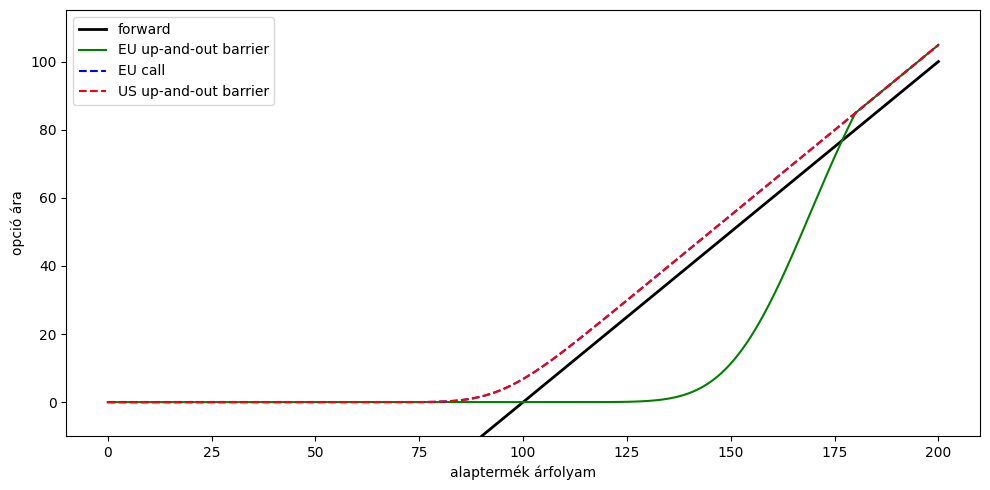

In [16]:
from pricer.pde_solver import BarrierUpAndInCallPDE, AmericanBarrierUpAndInCallPDE

S = 200
K = 100
T = 1
r = 0.05
sigma = 0.1
H = 180

n, m = 1000, 500

pde_config = {
    "x": np.linspace(0, S, n + 1),
    "t": np.linspace(0, T, m + 1),
    "strike": K,
    "r": r,
    "sigma": sigma,
    "barrier": H
}

price_pde_cls = BarrierUpAndInCallPDE(pde_config)
price_pde_cls.solve()

points = np.zeros((n + 1, 2))
points[:, 0] = pde_config["x"]
points[:, 1] = 1

price_pde = price_pde_cls.price(points)

price_pde_american_cls = AmericanBarrierUpAndInCallPDE(pde_config)
price_pde_american_cls.solve()
price_pde_american = price_pde_american_cls.price(points)

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(pde_config["x"], pde_config["x"] - K, label="forward", color="black", lw=2)
ax.plot(pde_config["x"], price_pde, label="EU up-and-out barrier", color="green")
ax.plot(analytical_config_call["underlier_price"], price_analytical_call, label="EU call", color="blue", linestyle="--")
ax.plot(pde_config["x"], price_pde_american,  label="US up-and-out barrier", color="red", linestyle="--")
ax.set_xlabel("alaptermék árfolyam")
ax.set_ylabel("opció ára")
_, ymax = ax.get_ylim()
ax.set_ylim(-10, ymax)
ax.legend()

plt.tight_layout()
plt.show()

Up-and-in barrier put

c:\Users\Kristof\Desktop\MSc_Szakdolgozat\codebase\src\pricer\analytical.py:53: RuntimeWarning: divide by zero encountered in log
  np.log(self.underlier / self.strike)
c:\Users\Kristof\Desktop\MSc_Szakdolgozat\codebase\src\pricer\analytical.py:52: RuntimeWarning: divide by zero encountered in divide
  d1 = (
c:\Users\Kristof\Desktop\MSc_Szakdolgozat\codebase\src\pricer\analytical.py:52: RuntimeWarning: invalid value encountered in divide
  d1 = (
100%|██████████| 200/200 [00:00<00:00, 304.96it/s]


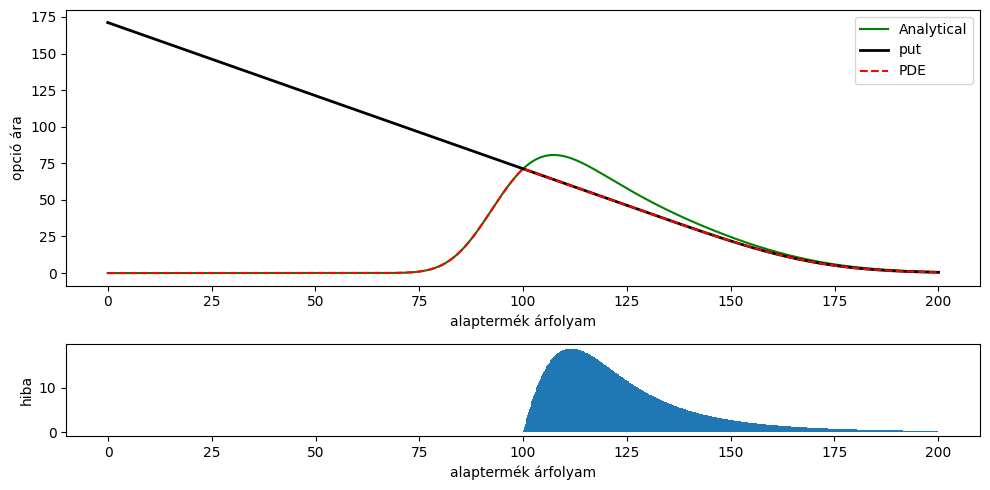

In [11]:
from pricer.analytical import BarrierUpAndInPut, BlackScholesPut
from pricer.pde_solver import BarrierUpAndInPutPDE

S = 200
K = 180
T = 1
r = 0.05
sigma = 0.1
H = 100

analytical_config = {
    "underlier_price": np.linspace(0.01, S, 1000),
    "strike": K,
    "expiry": T,
    "interest_rate": r,
    "volatility": sigma,
    "barrier": H,
}

analytical_config_call = {
    "underlier_price": np.linspace(0.01, S, 1000),
    "strike": K,
    "expiry": T,
    "interest_rate": r,
    "volatility": sigma,
}

price_analytical_call = BlackScholesPut(**analytical_config_call).price()
price_analytical = BarrierUpAndInPut(**analytical_config).price()

n, m = 1000, 200

pde_config = {
    "x": np.linspace(0, S, n + 1),
    "t": np.linspace(0, T, m + 1),
    "strike": K,
    "r": r,
    "sigma": sigma,
    "barrier": H
}

price_pde_cls = BarrierUpAndInPutPDE(pde_config)
price_pde_cls.solve()

points = np.zeros((1000, 2))
points[:, 0] = analytical_config["underlier_price"]
points[:, 1] = 1

price_pde = price_pde_cls.price(points)

fig, ax = plt.subplots(2, 1, figsize=(10, 5), gridspec_kw={'height_ratios': [3, 1]})

ax[0].plot(analytical_config["underlier_price"], price_analytical, label="Analytical", color="green")
ax[0].plot(analytical_config["underlier_price"], price_analytical_call, label="put", color="black", lw=2)
ax[0].plot(analytical_config["underlier_price"], price_pde, label="PDE", color="red", linestyle="--")
ax[0].set_xlabel("alaptermék árfolyam")
ax[0].set_ylabel("opció ára")
ax[0].legend()

ax[1].bar(analytical_config["underlier_price"], price_analytical - price_pde, width=0.2)
ax[1].set_xlabel("alaptermék árfolyam")
ax[1].set_ylabel("hiba")

plt.tight_layout()
plt.show()

American up-and-in barrier put

100%|██████████| 500/500 [00:00<00:00, 1393.87it/s]


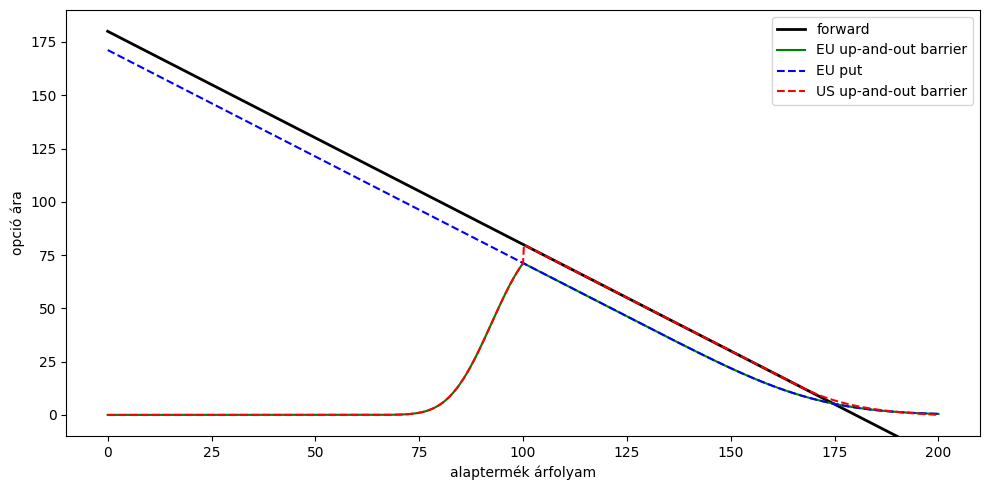

In [12]:
from pricer.pde_solver import BarrierUpAndInPutPDE, AmericanBarrierUpAndInPutPDE

S = 200
K = 180
T = 1
r = 0.05
sigma = 0.1
H = 100

n, m = 1000, 500

pde_config = {
    "x": np.linspace(0, S, n + 1),
    "t": np.linspace(0, T, m + 1),
    "strike": K,
    "r": r,
    "sigma": sigma,
    "barrier": H
}

price_pde_cls = BarrierUpAndInPutPDE(pde_config)
price_pde_cls.solve()

points = np.zeros((n + 1, 2))
points[:, 0] = pde_config["x"]
points[:, 1] = 1

price_pde = price_pde_cls.price(points)

price_pde_american_cls = AmericanBarrierUpAndInPutPDE(pde_config)
price_pde_american_cls.solve()
price_pde_american = price_pde_american_cls.price(points)

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(pde_config["x"], K - pde_config["x"], label="forward", color="black", lw=2)
ax.plot(pde_config["x"], price_pde, label="EU up-and-out barrier", color="green")
ax.plot(analytical_config_call["underlier_price"], price_analytical_call, label="EU put", color="blue", linestyle="--")
ax.plot(pde_config["x"], price_pde_american,  label="US up-and-out barrier", color="red", linestyle="--")
ax.set_xlabel("alaptermék árfolyam")
ax.set_ylabel("opció ára")
_, ymax = ax.get_ylim()
ax.set_ylim(-10, ymax)
ax.legend()

plt.tight_layout()
plt.show()

Down-and-out barrier call